# COGS 108 - Final Project 

# Overview

I'm curious about what features will birng parks higher ratings. Based on the data provided for individual project, I analyzed the Yelp Park Data and CA Environment Screening Data, to explore if parks with less PM2.5 concentration receive higher rating from park vistors. The result of my analysis is that PM2.5 concentration does not impact park rating in San Diego, which is not as I expected. After reflection, I attribute this to the overall high air quality in San Diego area, which makes PM2.5 concentration a similar and thus weak factor for rating. The result may vary if we change to a broader scope, such as nationally.

# Name & GitHub

- Name: Yutong Luo
- GitHub Username: rachelluoyt

# Research Question

Is air quality a factor that influences vistors' rating on parks in San Diego? That being said, do parks in higher air quality areas, more specifically, in areas with less PM2.5 concentration, receive higher ratings from visitors?

## Background and Prior Work

In this project, I'm intersted in the relation between air quality and park ratings. Based on my personal experience and research online, clean air is important for a park. Because park is a place for hiking, sporting or just relaxing, and visitors expect a healthy environment. "It is essential for the health of our visitors and employees, clean clear views of park scenery, and a healthy natural environment" according to the National Park Service website. 

However, PM2.5 gradually becomes a really harmful factor of air pollution with industrialization. According to Department of Health, "exposure to fine particles can cause short-term health effects such as eye, nose, throat and lung irritation, coughing, sneezing, runny nose and shortness of breath." Due to this fact, I decide to use PM2.5 concentration as a represemtative measurement of air quality in this project. More importantly, the air quality decreased in San Diego based on IQAir, : "In 2019, San Diego PM2.5 varied from concentrations from a low of 6 μg/m3, “good,” in March, to a high of 15.9 μg/m3, “moderate,” in November." With this change, I assume air quality will become a more important factor for vistors' feedbacks on parks in San Diego.

As to other related works, National Park Service Air Quality Analysis Methods 2020 includes PM2.5 as an important evaluation of air quality. This supports my use of PM2.5 as representative assessment of air quality. Yale Environment 360 provides that air pollution in 88 percent of parks impacts the habitat, which will influence visitor's experience. This adds credits to my project.


References (include links):
- 1) National Park Service https://www.nps.gov/subjects/air/airqualityparks.htm#:~:text=Over%20the%20last%2030%20years,and%20a%20healthy%20natural%20environment.

- 2) Department of Health
https://www.health.ny.gov/environmental/indoors/air/pmq_a.htm#:~:text=Fine%20particulate%20matter%20

- 3) IQAir
https://www.iqair.com/us/usa/california/san-diego#:~:text=In%202019%2C%20San%20Diego%20PM2,5%20pollution.

- 4) National Park Service Air Quality Analysis Methods 2020
    https://www.nps.gov/articles/analysis-methods2020.htm
    
- 5) Yale Environment 360
https://e360.yale.edu/digest/dangerously-high-air-pollution-levels-found-in-most-u-s-national-parks#:~:text=In%2088%20percent%20of%20parks,in%20the%20Lower%2048%20states.

# Hypothesis


Based on my background information research, my hypothesis is that parks with lower PM2.5 concentration will receive higher rating from visitors on Yelp. Because I want to analyze the relationship between air quality and park ratings, and PM2.5 concentration is a good representative of air quality. More over, intuitively and after research, air quality does impact the park habitat, which greatly influences visitor's rating for a park. Thus, I make this assumption that PM2.5 concentration and park rating is inversely related.

# Dataset(s)

## Dataset 1 
- Dataset Name: Yelp Data for San Diego Parks
- Link to the dataset: https://www.yelp.com/ (Prof Ellis curated these data for individual projects) 
- Number of observations: 833
- The variables I will use: name, rating, longitude, latitude
- The format I will store these variables: string, float from 1-5, float, float that represents geospatial data
- Varisbales: 

'name', 'address', 'phone', 'id', 'url', 'rating', 'review_count',
       'longitude', 'latitude', 'is_closed'

This dataset includes San Diego park information based on Yelp data. Each observation represents information about a park in San Diego, including name, address, phone, id, url, rating, number of reviews, latitude, longitude and if it is closed. It provides rating of each park, a critical feature that I want to analyze. And I will use the longitude and latitude to locate each park.

## Dataset 2  
- Dataset Name: California Environmental Health Screening Data
- Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0
- Number of observations: 8035
- The variables I will use: PM2.5, PM2.5 Pctl, Location 1
- The format I will store these variables: float, float, string that seperates latitude and longitude extracted from Lacation 1 data
- Variables: 

'Census Tract', 'Total Population', 'California County','Click for interactive map', 'CES 2.0 Score',
       'CES 2.0 Percentile Range', 'Hyperlink', 'Ozone', 'Ozone Pctl', 'PM2.5',
       'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl',
       'Pollution Burden', 'Pollution Burden Score', 'Pollution Burden Pctl',
       'Age', 'Age Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight',
       'Low Birth Weight Pctl', 'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty',
       'Poverty Pctl', 'Unemployment', 'Unemployment Pctl', 'Pop. Char. ',
       'Pop. Char. Score', 'Pop. Char. Pctl', 'Location 1'

This dataset includes California Environmental Health Screening Data. Each observation represents information about a location in California. It provides PM2.5 concentration and percentage of many locations in San Diego, another critical feature that I want to analyze. 

## Combine
I will match parks in dataset 1 with locations in dataset 2 based on the latitude and longitude. Thus, I can get corresponding PM2.5 concentration in each park. Then I can start analysis on rating & PM2.5 concentration.

# Setup
* Import two dataset that I will use, look at their size. One is Yelp data about park informstion in San Diego, the other is California environmental and health data.

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [66]:
parks = pd.read_csv('data/yelp_SD_parks.csv')


In [3]:
parks.shape

(833, 10)

In [4]:
cali = pd.read_csv('data/calenviroscreen-final-report.csv')

In [5]:
cali.shape

(8035, 52)

# Data Cleaning

### 1. yelp_SD_parks:
* I first checked and deal with missingness in this dataset. 
 * I found that 254 phone numbers are missing. Since I only consider the location and rating of parks, this is not a problem. Another missingness is the missing of latitude and longitude of Officer Christopher Wilson Memorial Park. Since there is only one review for it, I considered this park to be a less common one. Thus the deletion of it will not influence our overall result, so I dropped this row
* Check required data information and reformat when needed
    * Since the data I need -- rating and geospatial inforamtion -- do not have missingness, I checked their type and range to make sure they are in correct form, and make adjustment in case any of these is in inconsistent format. Luckily, all three columns are in correct and consistent formats. Thus, no other cleaning is needed on this dataset. 
* Extract the columns that needed for further analysis
    * including name, rating, longitude and latitude
* Plot and see the distribution of data
    * For parks, there are repitition of the same park in the dataset, not sure why this happens. I will deal with it in the next part after combining both tables together. 
    * For ratings, we can see most parks have high ratings. This is important to take into consideration when link this to the level of PM2.5 in that district


### 2. calenviroscreen-final-report:
* I took subset which only includes San Diego data from the whole CA dataset since we are analyzing parks in San Diego here.
* I check and deal with null values.
    * There is a few missingness in the dataset, but only one is missing considering the data I need, i.e. the PM2.5 data. I checked this and there was not much information about it. So I dropped this row.
* Reformat the columns I need 
    * The geospatial data is not in a convenient format, so I extract longitude and latitude info from strings in location column
* I extract the columns that needed for further analysis
    * PM2.5, PM2.5 percentile, longitude and latitude I just extracted from location column

**In this section, I cleaned the two datasets seperately. I will combine the two tables in the Data Analysis part, because it needs deeper exploration on each dataset then relate them together.

### 1. Yelp Park Data
#### Check missingness

In [6]:
parks.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [7]:
# check missingness of each col
parks.isnull().sum()

name              0
address           0
phone           254
id                0
url               0
rating            0
review_count      0
longitude         1
latitude          1
is_closed         0
dtype: int64

In [8]:
# look at the row with missing longitude and latitude
parks.loc[parks['longitude'].isnull()]

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
226,Officer Christopher Wilson Memorial Park,"San Diego, CA",NaN,fg97iBKVfgNgf3ehS6Rkvw,https://www.yelp.com/biz/officer-christopher-w...,4.0,1,NaN,NaN,False


In [9]:
# drop row with missing longitude and latitude
parks = parks.loc[parks['longitude'].isnull() == False]

In [10]:
parks.isnull().sum()

name              0
address           0
phone           253
id                0
url               0
rating            0
review_count      0
longitude         0
latitude          0
is_closed         0
dtype: int64

#### Check the format of related data

In [11]:
parks.latitude.dtype

dtype('float64')

In [12]:
parks.longitude.dtype

dtype('float64')

In [13]:
min(parks.latitude), max(parks.latitude)

(32.53267536, 34.29715665)

In [14]:
min(parks.longitude), max(parks.longitude)

(-118.64188, -116.3776179)

In [15]:
parks.rating.unique()

array([5. , 4.5, 3.5, 4. , 3. , 2.5, 1. , 1.5, 2. ])

#### Remove irrelevant information

In [16]:
parks = parks[['name','rating','latitude','longitude']]

#### Analyze the distribution of data

In [17]:
# notice we have repition in data, we will deal with it in the next analysis part after combination
parks.name.value_counts()

Rolling Hills Park         3
Zeglio Custom Clothiers    2
Horton Plaza Park          2
Sunset Park                2
San Dieguito River Park    2
                          ..
Inn at the Park            1
ALX                        1
Dog Park at Doyle Park     1
Robinson Realty            1
Mt Olivet Cemetery         1
Name: name, Length: 817, dtype: int64

In [18]:
parks[parks.name == 'Rolling Hills Park']

,name,rating,latitude,longitude
467,Rolling Hills Park,5.0,32.991300,-117.092192
468,Rolling Hills Park,4.0,32.659447,-116.969218
469,Rolling Hills Park,5.0,33.900170,-117.899939


Text(0.5, 1.0, 'Distribution of Yelp Park Ratings')

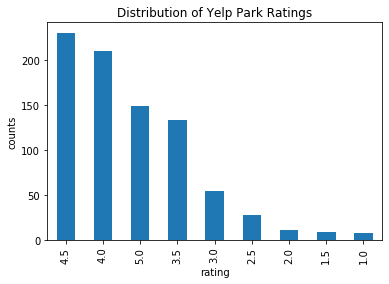

In [19]:
r = parks.rating.value_counts().plot(kind='bar',x='rating')
r.set_xlabel('rating')
r.set_ylabel('counts')
r.set_title("Distribution of Yelp Park Ratings")

### 2. Enviromental Data
#### Take subset from the overall dataset which include information about all California counties

In [20]:
cali.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
0,6019001100,3174,Fresno,NaN,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,...,21.6,83.66,77.500865,97.78,19.30,92.05,90.072268,9.360658,99.60,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,6019000300,3609,Fresno,NaN,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,...,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.90,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,6019000200,3167,Fresno,NaN,83.47,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.304446,84.40,14.554656,...,16.2,74.04,86.828423,99.66,25.27,98.14,91.499039,9.508958,99.80,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,6019001500,2206,Fresno,NaN,83.08,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.225687,78.25,14.937649,...,19.5,80.68,62.746088,88.32,18.30,89.60,83.474281,8.674967,97.74,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6019000600,6161,Fresno,NaN,82.95,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.327935,85.81,14.506413,...,16.9,75.49,88.680993,99.79,26.69,98.61,92.246260,9.586590,99.89,"Fresno 93721\n(36.743062999999999, -119.7933565)"


In [21]:
#only include data about San Diego
sd = cali[cali['California County'] == 'San Diego']

####  Check dataset and deal with missingness

In [22]:
sd.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
165,6073005000,2227,San Diego,NaN,59.91,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000812,5.05,10.404164,...,32.9,94.47,74.855946,96.65,NaN,NaN,80.024629,8.316532,95.15,"San Diego 92113\n(32.694850199999998, -117.141..."
299,6073003601,3250,San Diego,NaN,55.61,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001435,7.59,10.460384,...,27.3,90.59,76.636392,97.50,17.84,88.59,80.518487,8.367767,95.74,"San Diego 92113\n(32.690986199999998, -117.116..."
370,6073004900,5028,San Diego,NaN,54.23,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000923,5.37,10.430966,...,37.3,96.44,70.019802,94.09,13.77,72.61,77.443988,8.048304,92.80,"San Diego 92113\n(32.701852600000002, -117.138..."
466,6073003902,4927,San Diego,NaN,52.48,91-95%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001166,6.44,10.449528,...,37.2,96.43,76.470588,97.38,19.39,92.23,81.570728,8.477199,96.54,"San Diego 92113\n(32.696748999999997, -117.126..."
805,6073003901,4241,San Diego,NaN,47.82,86-90%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001217,6.66,10.469327,...,28.4,91.74,79.242069,98.29,28.52,99.12,81.980043,8.519704,96.81,"San Diego 92113\n(32.703556800000001, -117.126..."


In [23]:
sd.isnull().sum()

Census Tract                   0
Total Population               0
California County              0
Click for interactive map    627
CES 2.0 Score                  4
CES 2.0 Percentile Range       4
Hyperlink                      0
Ozone                          1
Ozone Pctl                     1
PM2.5                          1
PM2.5 Pctl                     1
Diesel PM                      0
Diesel PM Pctl                 0
Drinking Water                 1
Drinking Water Pctl            1
Pesticides                     0
Pesticides Pctl                0
Tox. Release                   0
Tox. Release Pctl              0
Traffic                        0
Traffic Pctl                   0
Cleanup Sites                  0
Cleanup Sites Pctl             0
Groundwater Threats            0
Groundwater Threats Pctl       0
Haz. Waste                     0
Haz. Waste Pctl                0
Imp. Water Bodies              0
Imp. Water Bodies Pctl         0
Solid Waste                    0
Solid Wast

In [24]:
# check the important missingness that relates to my analysis
sd[sd['PM2.5'].isnull()]

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
4098,6073021000,4440,San Diego,NaN,23.11,46-50%,http://oehha.maps.arcgis.com/apps/Viewer/index...,NaN,NaN,NaN,...,NaN,NaN,47.287341,71.44,13.46,70.94,57.725638,5.999127,64.3,"Borrego Springs 92004\n(33.1112185, -116.27356)"


In [25]:
#drop this null value in PM2.5 column
sd = sd[sd['PM2.5'].isnull() == False]

In [26]:
sd.head(2)

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
165,6073005000,2227,San Diego,NaN,59.91,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000812,5.05,10.404164,...,32.9,94.47,74.855946,96.65,NaN,NaN,80.024629,8.316532,95.15,"San Diego 92113\n(32.694850199999998, -117.141..."
299,6073003601,3250,San Diego,NaN,55.61,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001435,7.59,10.460384,...,27.3,90.59,76.636392,97.50,17.84,88.59,80.518487,8.367767,95.74,"San Diego 92113\n(32.690986199999998, -117.116..."


#### Reformat and store geospatial data 

In [27]:
# split string about location info to longitude and latitude

In [28]:
def longtitude(s):
    i1 = s.find('(')
    i2 = s.find(',')
    i3 = s.find(')')
    latitude = s[i1+1:i2]
    longitude = s[i2+ 2: i3]
    return longitude

def latitude(s):
    i1 = s.find('(')
    i2 = s.find(',')
    i3 = s.find(')')
    latitude = s[i1+1:i2]
    longitude = s[i2+ 2: i3]
    return latitude

In [29]:
sd['longitude'] = sd['Location 1'].apply(longtitude)
sd['latitude'] = sd['Location 1'].apply(latitude)

In [30]:
sd.columns

Index(['Census Tract', 'Total Population', 'California County',
       'Click for interactive map', 'CES 2.0 Score',
       'CES 2.0 Percentile Range', 'Hyperlink', 'Ozone', 'Ozone Pctl', 'PM2.5',
       'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl',
       'Pollution Burden', 'Pollution Burden Score', 'Pollution Burden Pctl',
       'Age', 'Age Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight',
       'Low Birth Weight Pctl', 'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty',
       'Poverty Pctl', 'Unemployment', 'Unemployment Pctl', 'Pop. Char. ',
       'Pop. Ch

In [31]:
sd.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1,longitude,latitude
165,6073005000,2227,San Diego,NaN,59.91,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000812,5.05,10.404164,...,74.855946,96.65,NaN,NaN,80.024629,8.316532,95.15,"San Diego 92113\n(32.694850199999998, -117.141...",-117.1411746,32.694850199999998
299,6073003601,3250,San Diego,NaN,55.61,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001435,7.59,10.460384,...,76.636392,97.50,17.84,88.59,80.518487,8.367767,95.74,"San Diego 92113\n(32.690986199999998, -117.116...",-117.1165151,32.690986199999998
370,6073004900,5028,San Diego,NaN,54.23,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000923,5.37,10.430966,...,70.019802,94.09,13.77,72.61,77.443988,8.048304,92.80,"San Diego 92113\n(32.701852600000002, -117.138...",-117.138677,32.701852600000002
466,6073003902,4927,San Diego,NaN,52.48,91-95%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001166,6.44,10.449528,...,76.470588,97.38,19.39,92.23,81.570728,8.477199,96.54,"San Diego 92113\n(32.696748999999997, -117.126...",-117.1263197,32.696748999999997
805,6073003901,4241,San Diego,NaN,47.82,86-90%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001217,6.66,10.469327,...,79.242069,98.29,28.52,99.12,81.980043,8.519704,96.81,"San Diego 92113\n(32.703556800000001, -117.126...",-117.12673770000001,32.703556800000001


#### Extract columns needed

In [32]:
#take subset that only include info we want
sd = sd[['PM2.5','PM2.5 Pctl','longitude','latitude']]

In [33]:
sd.head()

,PM2.5,PM2.5 Pctl,longitude,latitude
165,10.404164,53.69,-117.1411746,32.694850199999998
299,10.460384,54.46,-117.1165151,32.690986199999998
370,10.430966,54.04,-117.138677,32.701852600000002
466,10.449528,54.23,-117.1263197,32.696748999999997
805,10.469327,54.63,-117.12673770000001,32.703556800000001


In [34]:
# get a sense about the distribution of data
sd.describe()

,PM2.5,PM2.5 Pctl
count,626.000000,626.000000
mean,10.029734,49.600863
std,0.894758,11.059488
min,6.977767,11.330000
25%,9.904120,48.877500
50%,10.386608,53.415000
75%,10.610759,56.665000
max,10.890265,60.700000


#### Plot the distribution

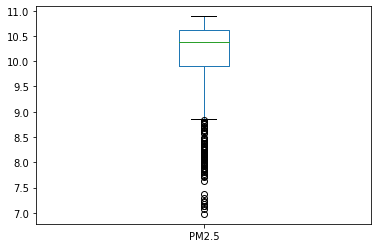

In [35]:
sd['PM2.5'].plot(kind='box')

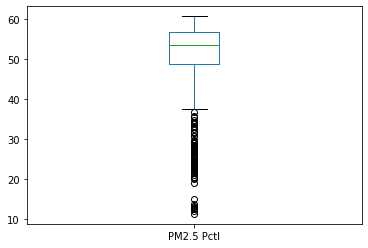

In [36]:
sd['PM2.5 Pctl'].plot(kind='box')

Based on this distribution, we can use the median of PM2.5 concentration as a cutoff to decide the air quality

# Data Analysis & Results

## EDA

Visualize all park locations in San Diego, to get a sense of the geospatial distribution

In [37]:
gpark = geopandas.GeoDataFrame(
    parks, geometry=geopandas.points_from_xy(parks.longitude, parks.latitude))

Text(0.5, 1, 'Yelp Parks Location')

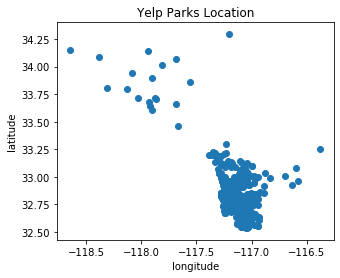

In [38]:
p = gpark.plot()
p.set_xlabel('longitude')
p.set_ylabel('latitude')
p.set_title('Yelp Parks Location')

Visualize the SD locations in report, to get a sense of the geospatial distribution of these locations in San Diego

In [39]:
gsd = geopandas.GeoDataFrame(
    sd, geometry=geopandas.points_from_xy(sd.longitude,sd.latitude))

Text(0.5, 1, 'San Diego Environmental Data Location')

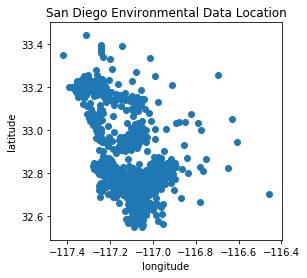

In [40]:
s = gsd.plot()
s.set_xlabel('longitude')
s.set_ylabel('latitude')
s.set_title('San Diego Environmental Data Location')

Layer two maps together to see any overlap, this helps us to decide the air quality in each park


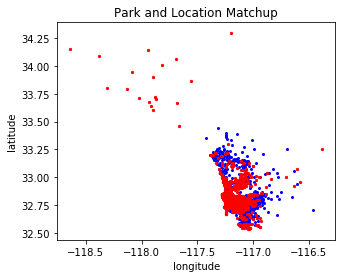

In [41]:
fig, ax = plt.subplots()

ax.set_aspect('equal')
ax.set_title('Park and Location Matchup')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

gsd.plot(ax=ax, marker='o', color='blue', markersize=4)

gpark.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show();

We can see there are many overlaps, so try to merge the two tables based on geospatial info, to extract parks that we can decide their air quality.

Extract the overlap based roughly based on the map

In [42]:
parks[(parks.longitude>-117.5) & (parks.longitude<-116.8)]

,name,rating,latitude,longitude,geometry
0,Balboa Park,5.0,32.734502,-117.153150,POINT (-117.15315 32.73450)
1,Civita Park,4.5,32.778315,-117.147278,POINT (-117.14728 32.77831)
2,Waterfront Park,4.5,32.721952,-117.172479,POINT (-117.17248 32.72195)
3,Trolley Barn Park,4.5,32.762463,-117.143789,POINT (-117.14379 32.76246)
4,Bay View Park,5.0,32.701785,-117.178967,POINT (-117.17897 32.70179)
...,...,...,...,...,...
828,Del Cerro - San Diego,4.5,32.792626,-117.073524,POINT (-117.07352 32.79263)
829,San Diego Metropolitan Transit System,2.5,32.705760,-117.153400,POINT (-117.15340 32.70576)
830,Petco Park,4.0,32.707246,-117.157054,POINT (-117.15705 32.70725)
831,Ann D. L'Heureux Memorial Dog Park,3.0,33.171137,-117.316419,POINT (-117.31642 33.17114)


Try join two tables directly on exsiting geospatial data

In [43]:
geopandas.sjoin(gsd, gpark, how="inner", op='intersects')

,PM2.5,PM2.5 Pctl,longitude_left,latitude_left,geometry,index_right,name,rating,latitude_right,longitude_right


We can see there are no joint locations using exsiting geospatial data

So we buffer the locations in Dan Diego data with diameters to make them intersect with park locations. Then we are able to match up locations. 


After a few trials of diameter, 0.0072 is the best to represent the match up on map

In [44]:
g1 = gsd.copy()
g1.geometry = g1.geometry.buffer(0.0072)

Match up San Diego Environmantal data with park locations

In [45]:
df = geopandas.sjoin(g1, gpark, how="inner", op='intersects')

In [46]:
df.shape

(791, 10)

In [47]:
df.head()

,PM2.5,PM2.5 Pctl,longitude_left,latitude_left,geometry,index_right,name,rating,latitude_right,longitude_right
165,10.404164,53.69,-117.1411746,32.694850199999998,"POLYGON ((-117.13397 32.69485, -117.13401 32.6...",167,Chicano Park,4.5,32.69837,-117.141790
370,10.430966,54.04,-117.138677,32.701852600000002,"POLYGON ((-117.13148 32.70185, -117.13151 32.7...",167,Chicano Park,4.5,32.69837,-117.141790
299,10.460384,54.46,-117.1165151,32.690986199999998,"POLYGON ((-117.10932 32.69099, -117.10935 32.6...",702,Dorothy Petway Neighborhood Park,1.5,32.69297,-117.118942
370,10.430966,54.04,-117.138677,32.701852600000002,"POLYGON ((-117.13148 32.70185, -117.13151 32.7...",543,Guadalupana Memorial Chapel,5.0,32.70607,-117.137980
2056,10.450206,54.25,-117.1381401,32.708455999999998,"POLYGON ((-117.13094 32.70846, -117.13097 32.7...",543,Guadalupana Memorial Chapel,5.0,32.70607,-117.137980


Drop redundant columns

In [48]:
df = df[['PM2.5','PM2.5 Pctl','name','rating']]
df = df.set_index('name')

In [49]:
df

,PM2.5,PM2.5 Pctl,rating
name,,,
Chicano Park,10.404164,53.69,4.5
Chicano Park,10.430966,54.04,4.5
Dorothy Petway Neighborhood Park,10.460384,54.46,1.5
Guadalupana Memorial Chapel,10.430966,54.04,5.0
Guadalupana Memorial Chapel,10.450206,54.25,5.0
...,...,...,...
Scripps Ranch Villages Butterfly Park,10.598320,56.46,5.0
Bird Rock,10.053453,49.79,4.5
Zeglio Custom Clothiers,10.053453,49.79,5.0


We can see from above that there are different information about one park. This happens for two reasons. 
* The first is that this duplicates existed in the source data as we see from the Data Cleaning Part. We cannot deal with this because we do not have enough information about the Yelp Parks Data to explain this. 
* The other is the same park intersets with different locations from the San Diego Environmental Data. We can solve by randomly take one of these to represent the information about each park.

Based on the two reasoning, we will only take the first occurance of these repititions into analysis.

In [50]:
df = df[~df.index.duplicated(keep='first')]

In [51]:
df.head()

,PM2.5,PM2.5 Pctl,rating
name,,,
Chicano Park,10.404164,53.69,4.5
Dorothy Petway Neighborhood Park,10.460384,54.46,1.5
Guadalupana Memorial Chapel,10.430966,54.04,5.0
Memorial Skate Park,10.449528,54.23,3.5
San Diego Trolley,10.393500,53.52,3.5


In [52]:
df.index.value_counts()

Switzer Canyon Open Space Park           1
Pernicano Realty & Management Company    1
The Observatory North Park               1
Kearny Mesa Park                         1
Lake Miramar                             1
                                        ..
Thread Show                              1
Van Dam Peak                             1
Mountain View Mini Park                  1
Villa Pacific Apartments                 1
Mt Olivet Cemetery                       1
Name: name, Length: 519, dtype: int64

Now let's start analysis on relations between rating and PM2.5 concentration.

First plot the distribution of Rating & PM2.5 concentration seperately to learn about their distributions

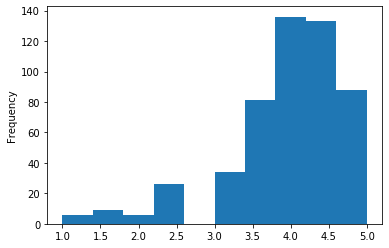

In [53]:
df.rating.plot(kind='hist')

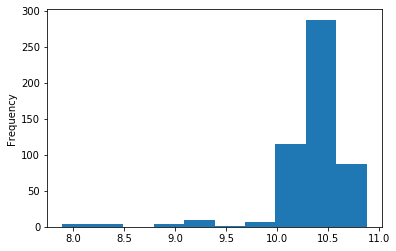

In [54]:
df['PM2.5'].plot(kind='hist')

There seems to be some relations. 

We plot them together to see if there is any relations between the two variables

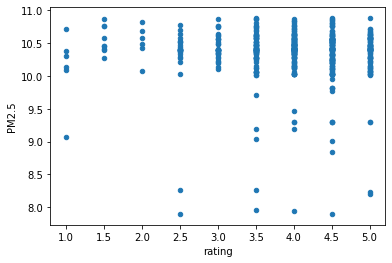

In [70]:
df.plot(kind='scatter',x='rating',y='PM2.5')

The relation is not straightforward based on the plot. The linear relation I expected does not come up. Even though it seems that points are more scattered around relative high ratings

Assign two groups based on air qualities, one is above median while the other is below based on our analysis from Data Cleaning Section

In [56]:
med = np.median(df['PM2.5'])
med

10.41099557

In [57]:
def quality(a):
    if a <= med:
        return 'below'
    return 'above'

df['Air Quality'] = df['PM2.5'].apply(quality)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Plot rating distribution of two air quality groups

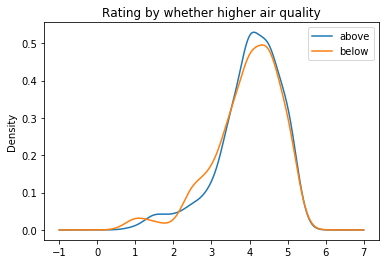

In [58]:
title='Rating by whether higher air quality'
(
    df
    .groupby('Air Quality')['rating']
    .plot(kind='kde', legend=True, subplots=False, title=title)
);   

It seems that the two rating groups based on PM2.5 concentration have somewhat different distribution. If this is true, it can confirm my hypothesis that rating is influenced by PM2.5 concentration.

## Analysis

### Test my hypothesis by permutation test
* Null Hypothesis: the two rating groups based on PM2.5 concentration are from the same distribution
* If this is true, we know PM2.5 has no effect on park rating

In [59]:
df = df.reset_index()

In [60]:
#code and idea borrowed from DSC80

n_repetitions = 500

differences = []
for _ in range(n_repetitions):
    
    # shuffle the rating
    shuffled_rating = (
        df['rating']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    
    # put them in a table
    shuffled = (
        df
        .assign(**{'Shuffled Rating': shuffled_rating})
    )

    
    # compute the group differences (test statistic!)
    group_means = (
        shuffled
        .groupby('Air Quality')
        .mean()
        .loc[:, 'Shuffled Rating']
    )
   
    difference = group_means.diff().iloc[-1]
    
    # add it to the list of results
    differences.append(difference)

In [61]:
observed_difference = (
    df
    .groupby('Air Quality')['rating']
    .mean()
    .diff()
    .iloc[-1]
)

Draw the test result and the original difference

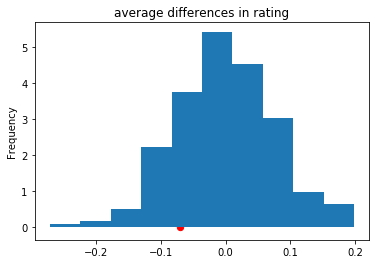

In [62]:
title = 'average differences in rating'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.scatter(observed_difference, 0, color='red', s=40);

Based on the data, it seems that the two groups are from the same distribution

Calculte p-value to confirm

In [63]:
pval = np.count_nonzero(differences >= observed_difference) / n_repetitions
pval

0.836

#### Result
* Since p value > 0.05, we **cannot** reject the null hypothesis that above/below PM2.5 median concentration have the similar rating.
* Thus, the effect of air quality (PM2.5 concentration) on parking rating is trivial, contrary to what  I thaught.

#### Interpretation
After doing some research and carefully reflecting this unexpcted result, I realized that it is because all the PM2.5 concentrations are relatively low in San Diego. When all the parks have good air quality, this will not be considered as an influencial factor when visitors rate parks in San Diego

# Ethics & Privacy

Permission of use: These datasets are provided for individual projects, so I have permission to use them for my analysis

Privacy concern: These data are about parks and environmental information in San Diego, and it does not include individual information. Thus, there will not be any privacy concerns. 

Issues: 
1. Since I need to match up park locations with locations in California Environmental Screening data, there exists inaccuracy in this matchup process. First of all, I used a buffer with diameter of 0.0072 to make PM2.5 location points big enough to intersect with park locations, and this is a rough estimation instead of exact match. Secondly, a single park can be mapped to different locations in the environmental data, and I decided to randomly take one from it. 
2. Another issue exsits in the original dataset. There exsits data of different ratings for the same park. This is problematic since a single location should not have various ratings. 

Deal with issues:
1. After a few trials, I picked the diameter that can best simulate the match up between locations by comparing them to the range I got based on visualization. This is the best I can do to minimize the error in this process. Due to my limit of skills on this question, this is the farthest I can go. However, there might be other advanced ways to do it more precisely that I just do not know. 
2. There is only one park that have different ratings in Yelp Data, and I did not find more information about this from source data. Since there is just 1 review for this park, I assume this is a uncommon park that is not visited often by visitors. So I decided to drop this park assuming this outlier will not influence my result. If I can have more information regarding this, or popular parks have various ratings, I can deal with it in other ways, such as partition park into different parts or use the average rating for the park.

Other issues:
There exists bias too. Because my analysis of rating is based on Yelp data, I can only get the rating of Yelp users. Due to this, I cannot know feedback from other visitors who visited but did not rate on Yelp, who do not know how to use Yelp such elderly and who cannot afford a phone to use Yelp. And we are not sure if all racial groups can have access to Yelp. This limit the ratings for parks from some groups, which are important and cannot be ignored. We might want to deal with this by asking visitors about their ratings in each park and record their responses.

# Conclusion & Discussion

My project analyzed if air quality can help park visitors to decide their rating for parking in San Diego. Based on my research, PM2.5 concentration is a good index to reflect air quality, thus I decide to narrow down my scope to find relationship between PM2.5 contentration and rating for each Park in San Diego. I utilized two datasets. One is the San Diego Park Yelp Data. This dataset includes park information from Yelp. The rating and location variables are crucial for my analysis. Another is the California Environmental Health Screening Data. This dataset includes environmental data about different locations in California. I will only take San Diego county into consideration since I'm looking at San Diego parks. This dataset includes many variables, but only PM2.5 concentration and location will be analyzed in my project. I combined the two dataset by mapping each park to a location point in the environmental data based on longitude and latitude. 

After cleaning the two datasets and extract the columns I needed seperately, I analyzed the distribution of PM2.5 concentration and park rating seperately. The correlation between them was not as strong and linear as I expected. So I divided rating into two groups based on if the PM2.5 concentration is above or below its median, and plotted the two distribution out to see if they are similar. It seemed that there was some difference, but we cannot decide based on plot. Consequently, I did a permutation test to test my hypothsis of inverse relation between the two features. The result was unexpected. It showed that the two rating groups are from the same distribution, that being that, the PM2.5 concentration has no effect on park ratings.

After reflecting this unexpcted result, I realized that it was because the overall PM2.5 concentration in San Diego is low. Thus, when all the parks have good air qualities, this will mostly not be taken into consideration by visistors. Because when one feature is shared by everyone, that feature is not that important anymore. This result shows that the government do not need to worry about the PM2.5 in parks when improving parks. If this project is more generalized to a broader scope, such as national parks in United States, the results will probably vary because each state will have more various air qualities.

My project has another limitation that it does not take ratings from all visitors. Because the park rating is derived from Yelp, this excludes some groups who did not rate on Yelp or do not have access to Yelp. This is a bias that needs to be addressed. A possible way is to survey visitors in parks and record their rating for each park while it is time consuming. Or we can get data from different sources to minimize this bias.